In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df16_4 = pd.read_csv("outputs/GenomeOcean-4B_4_float16_quant_embeddings_comparison.csv")
dfb16_4 = pd.read_csv("outputs/GenomeOcean-4B_4_bfloat16_quant_embeddings_comparison.csv")
df32_4 = pd.read_csv("outputs/GenomeOcean-4B_4_float32_quant_embeddings_comparison.csv")
df4 = pd.concat([df16_4, dfb16_4, df32_4], ignore_index=True)
df4

,model,batch_size,precision,quant_mode,mean_cosine_similarity,std_cosine_similarity,mean_square_error,mean_L2_distance,std_l2_distance
0,DOEJGI/GenomeOcean-4B,4,float16,8bit,0.999858,0.000137,0.000037,0.325070,0.083625
1,DOEJGI/GenomeOcean-4B,4,float16,4bit_nf4,0.997485,0.000791,0.000666,1.413888,0.217518
2,DOEJGI/GenomeOcean-4B,4,float16,4bit_fp4,0.994362,0.002140,0.001462,2.087385,0.366756
3,DOEJGI/GenomeOcean-4B,4,float16,4bit_nf4_double,0.997450,0.000813,0.000676,1.424111,0.223269
4,DOEJGI/GenomeOcean-4B,4,bfloat16,8bit,0.999858,0.000137,0.000037,0.324835,0.083571
5,DOEJGI/GenomeOcean-4B,4,bfloat16,4bit_nf4,0.997452,0.000802,0.000675,1.423362,0.220289
6,DOEJGI/GenomeOcean-4B,4,bfloat16,4bit_fp4,0.994344,0.002146,0.001467,2.090680,0.367316
7,DOEJGI/GenomeOcean-4B,4,bfloat16,4bit_nf4_double,0.997438,0.000814,0.000680,1.427734,0.224082
8,DOEJGI/GenomeOcean-4B,4,float32,8bit,0.999858,0.000137,0.000037,0.325070,0.083625
9,DOEJGI/GenomeOcean-4B,4,float32,4bit_nf4,0.997485,0.000791,0.000666,1.413787,0.217459


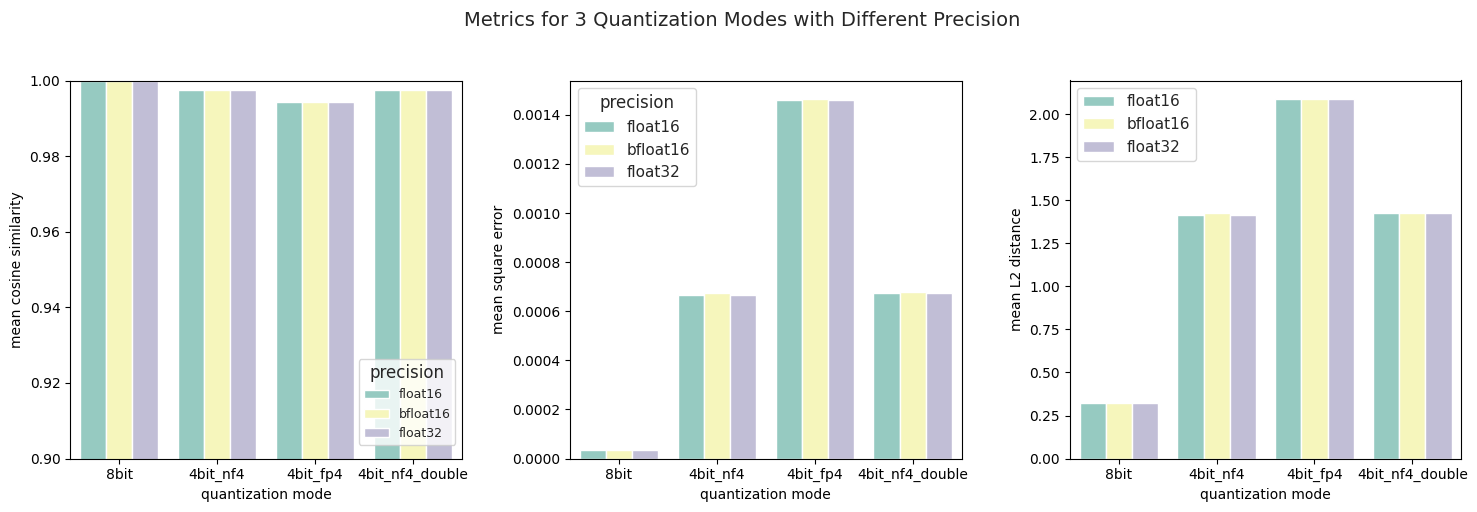

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  

sns.set_theme(style="whitegrid")  
sns.set_palette('Set3')          

sns.barplot(data = df4, x= "quant_mode", y = "mean_cosine_similarity", ax = ax[0], hue = 'precision')
ax[0].set_xlabel("quantization mode")
ax[0].set_ylabel("mean cosine similarity")
ax[0].legend(
    title = 'precision',
    loc="lower right",
    bbox_to_anchor=(1, 0.02),
    frameon=True,
    fontsize=9
)    
ax[0].set_ylim(0.9, 1.0)


sns.barplot(data = df4, x= "quant_mode", y = "mean_square_error", ax = ax[1], hue = 'precision')
ax[1].set_xlabel("quantization mode")
ax[1].set_ylabel("mean square error")

sns.barplot(data = df4, x= "quant_mode", y = "mean_L2_distance", ax = ax[2], hue = 'precision')
ax[2].set_xlabel("quantization mode")
ax[2].set_ylabel("mean L2 distance")

fig.suptitle("Metrics for 3 Quantization Modes with Different Precision", fontsize=14, y=1.02)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()